c:\Users\joshu\nice\.venv\Lib\site-packages\mne\externals\tempita\__init__.py:35: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
  import cgi


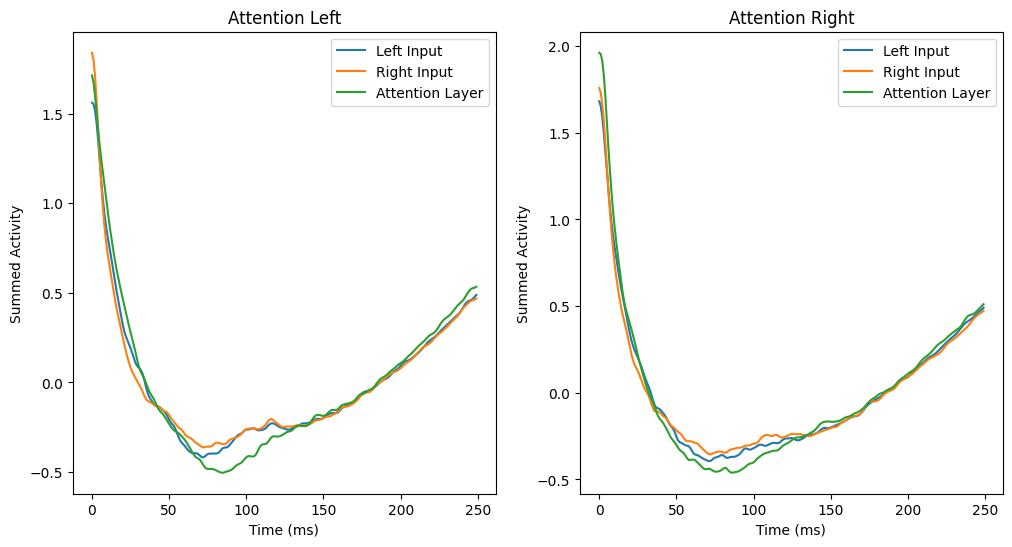

n_samples: 250

=== After Concatenation ===
After concatenation, shape: (1404, 250)
raw data right shape: (3, 134000)
[0.1   0.102 0.104 ... 0.346 0.348 0.35 ]
tau_samples for [8, 16, 32, 64]: [4, 8, 16, 32]


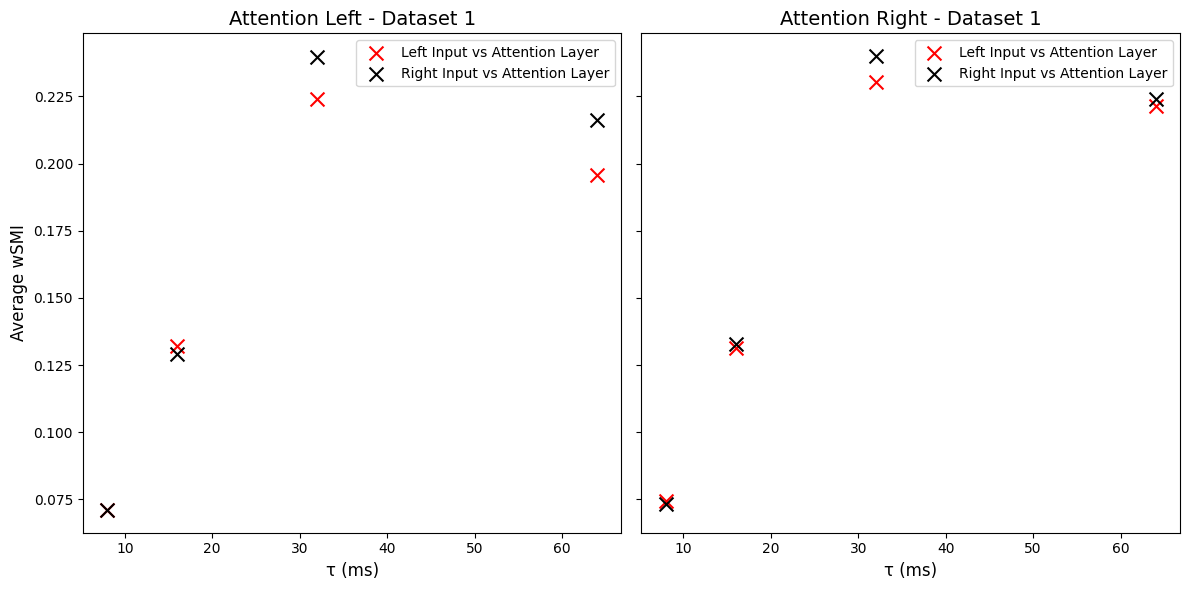

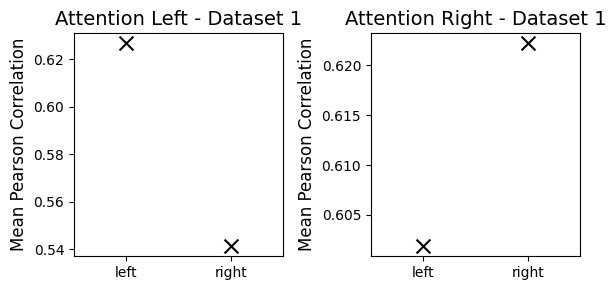

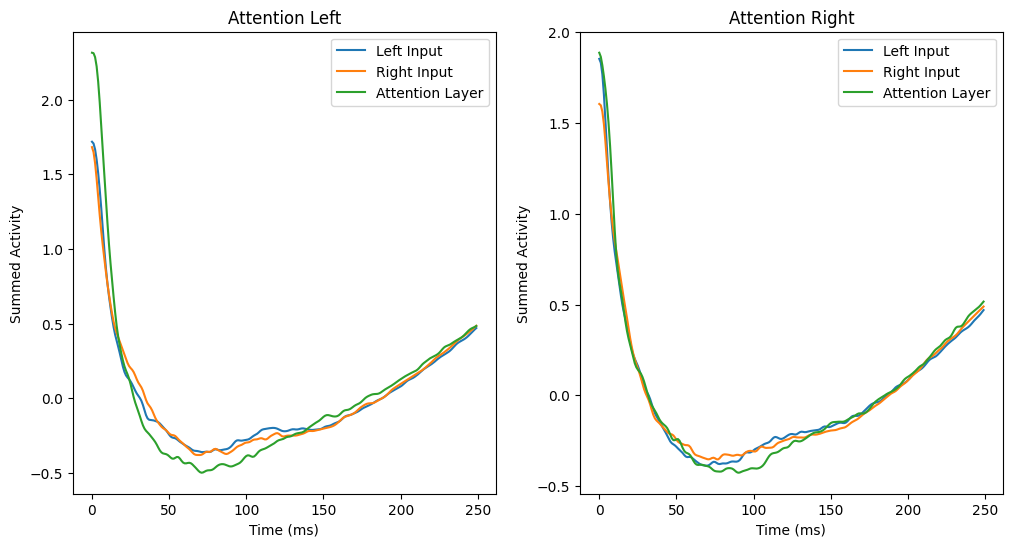

n_samples: 250

=== After Concatenation ===
After concatenation, shape: (1389, 250)
raw data right shape: (3, 119750)
[0.1   0.102 0.104 ... 0.346 0.348 0.35 ]
tau_samples for [8, 16, 32, 64]: [4, 8, 16, 32]


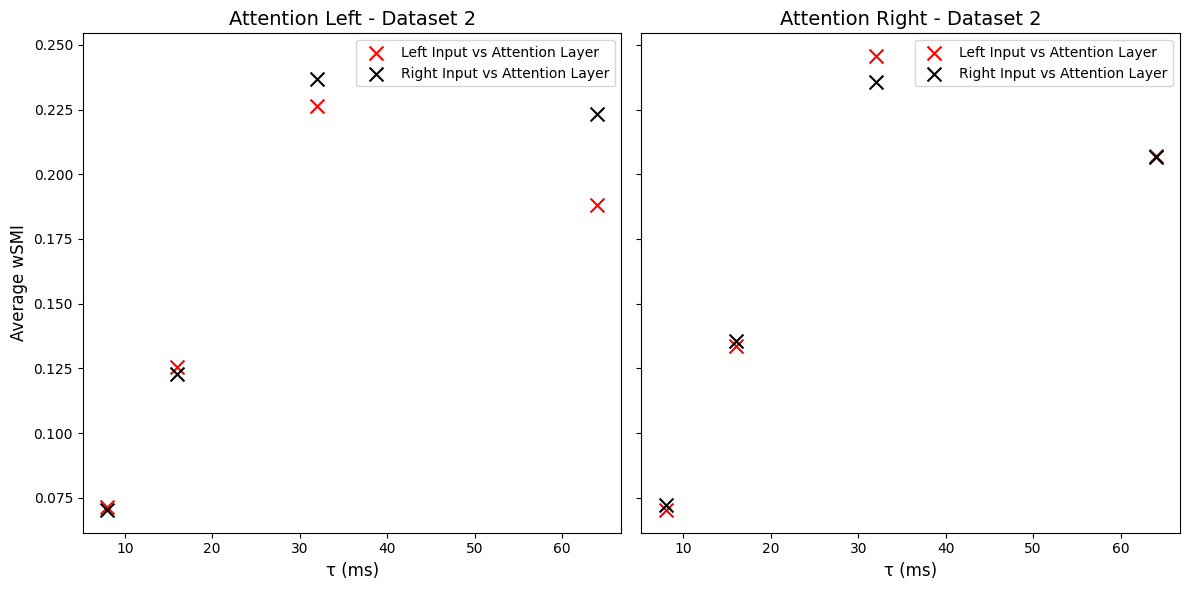

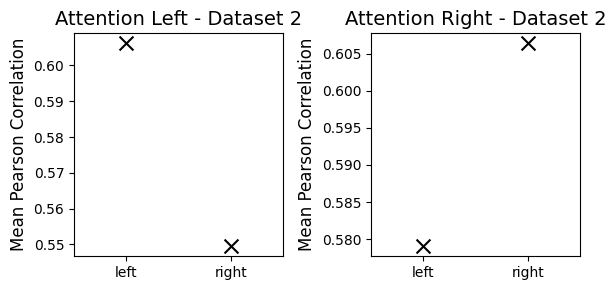

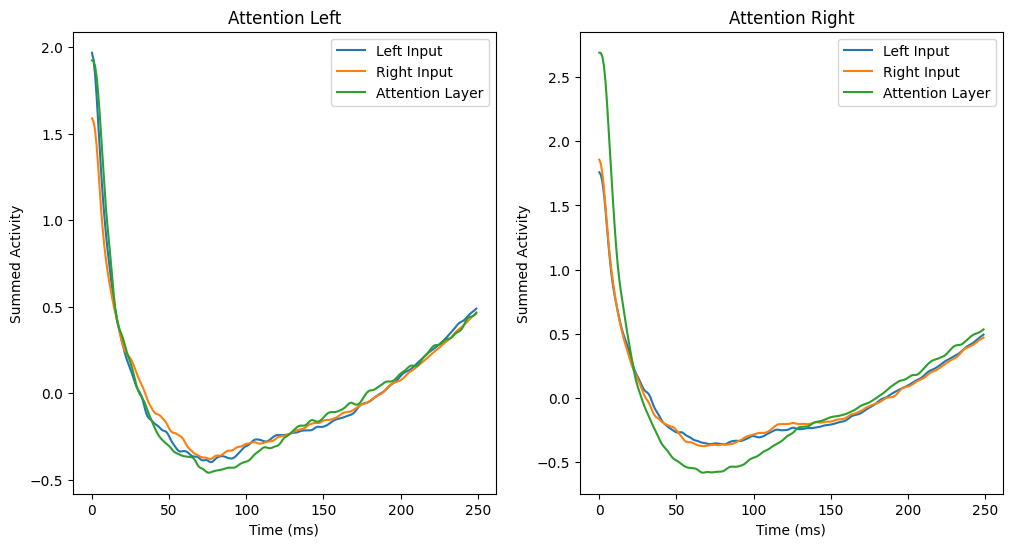

n_samples: 250

=== After Concatenation ===
After concatenation, shape: (1401, 250)
raw data right shape: (3, 125250)
[0.1   0.102 0.104 ... 0.346 0.348 0.35 ]
tau_samples for [8, 16, 32, 64]: [4, 8, 16, 32]


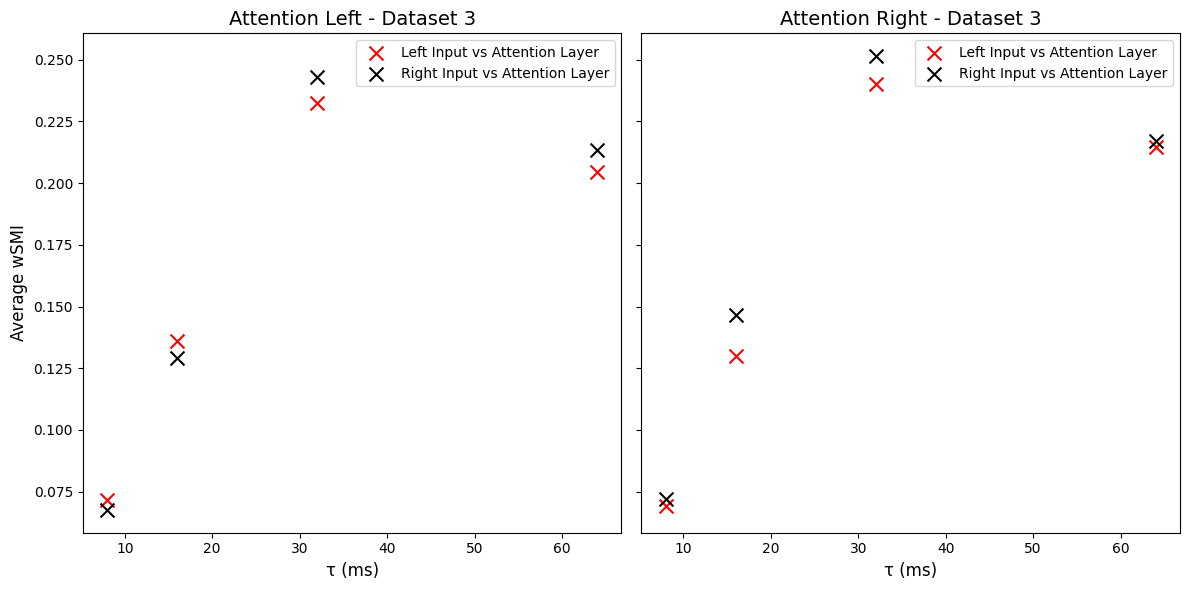

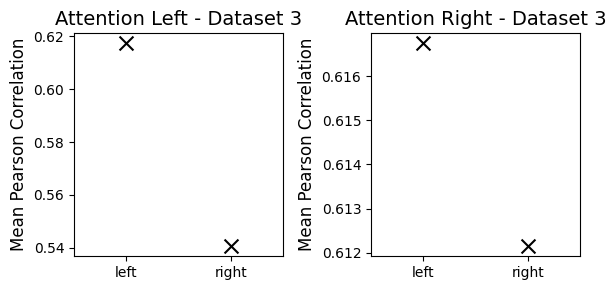

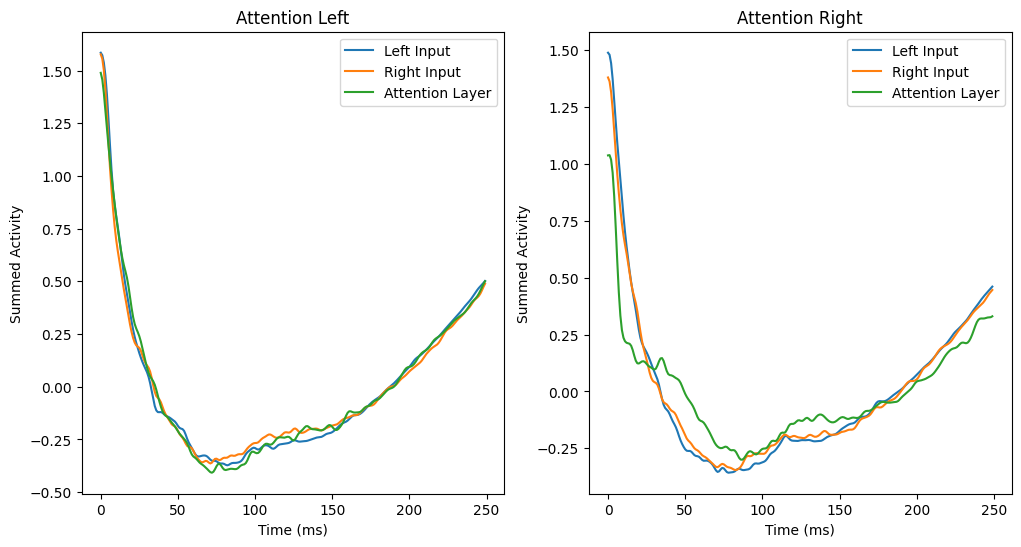

n_samples: 250

=== After Concatenation ===
After concatenation, shape: (1413, 250)
raw data right shape: (3, 113750)
[0.1   0.102 0.104 ... 0.346 0.348 0.35 ]
tau_samples for [8, 16, 32, 64]: [4, 8, 16, 32]


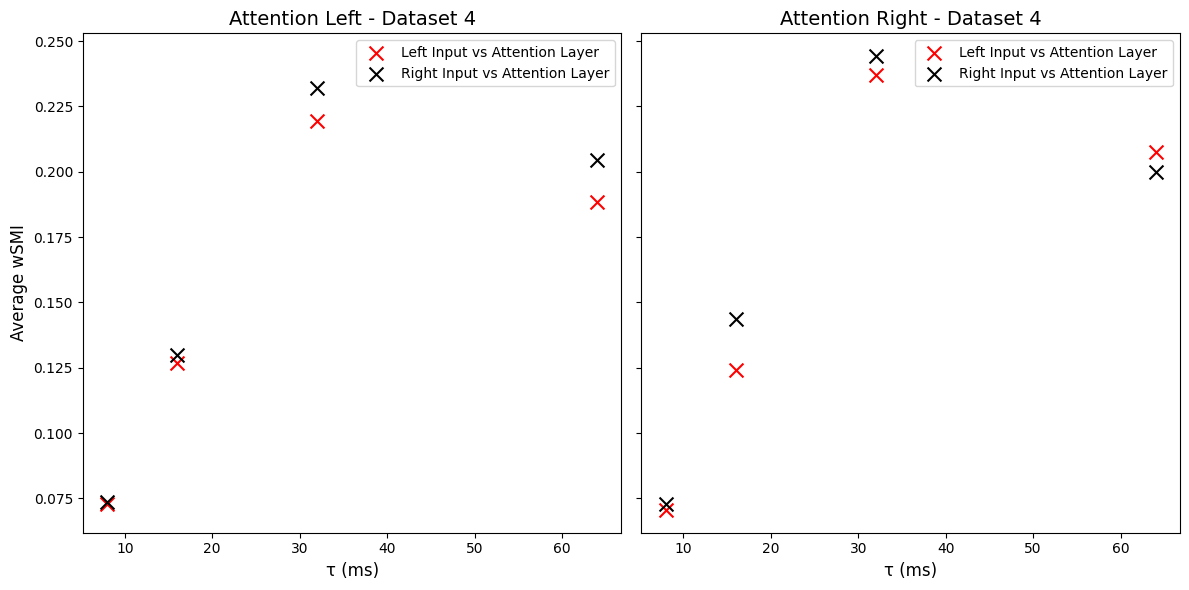

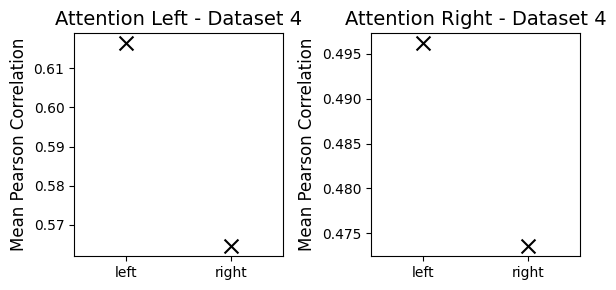

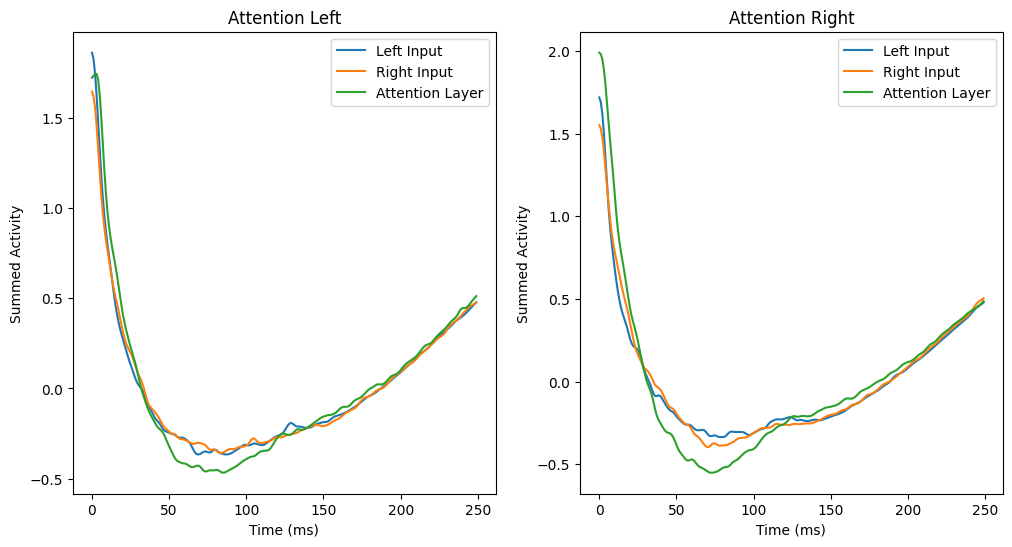

n_samples: 250

=== After Concatenation ===
After concatenation, shape: (1476, 250)
raw data right shape: (3, 118250)
[0.1   0.102 0.104 ... 0.346 0.348 0.35 ]
tau_samples for [8, 16, 32, 64]: [4, 8, 16, 32]


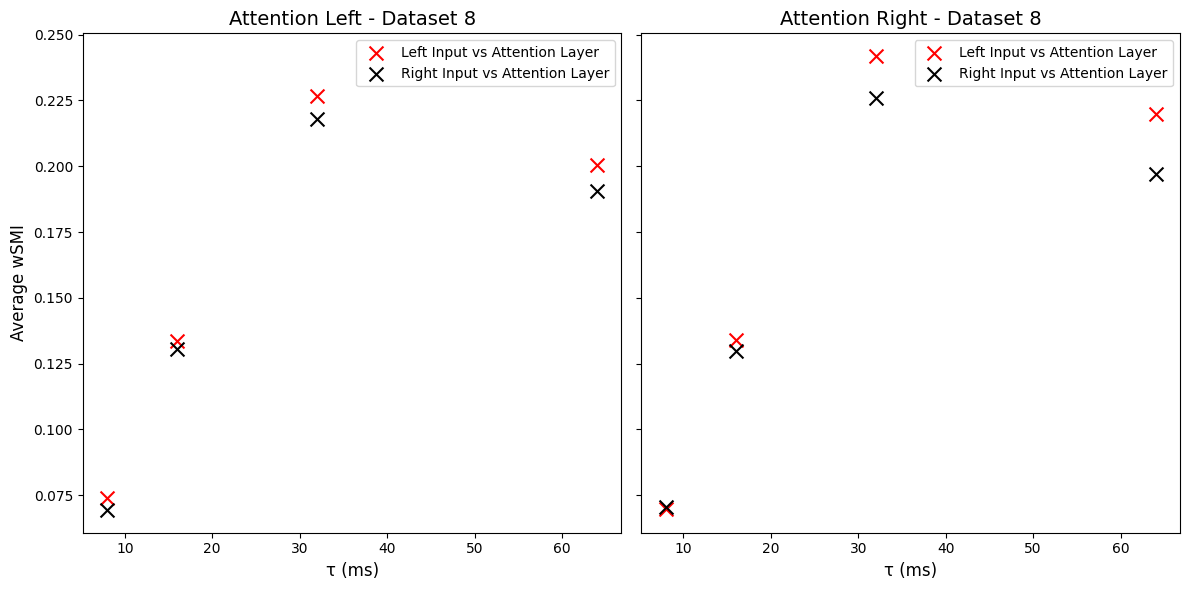

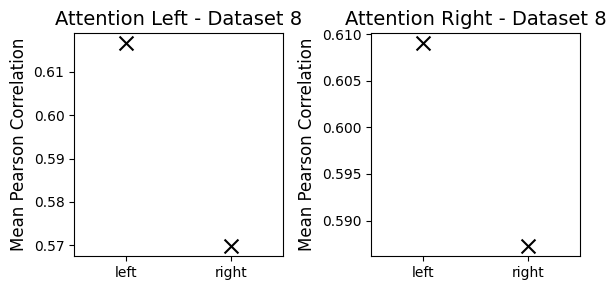

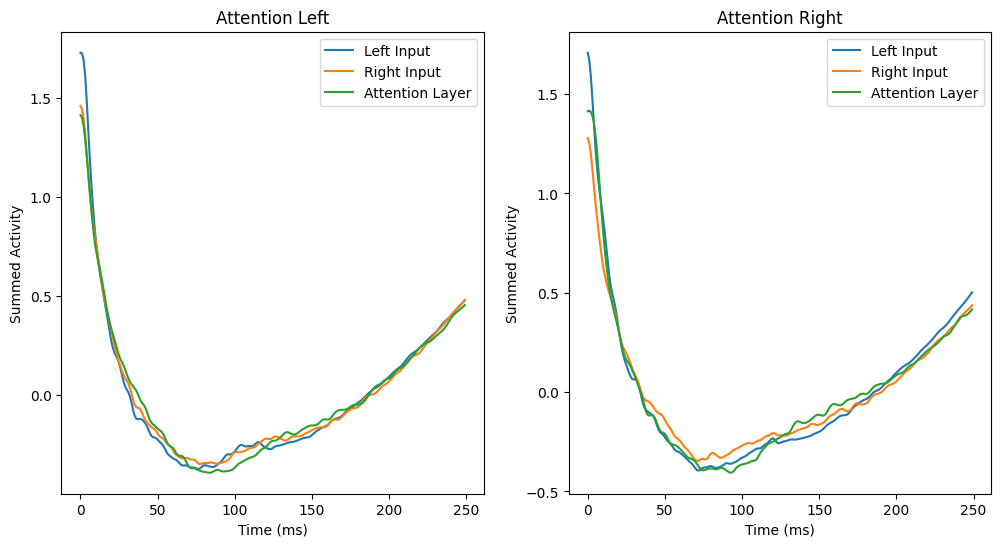

n_samples: 250

=== After Concatenation ===
After concatenation, shape: (1509, 250)
raw data right shape: (3, 117750)
[0.1   0.102 0.104 ... 0.346 0.348 0.35 ]
tau_samples for [8, 16, 32, 64]: [4, 8, 16, 32]


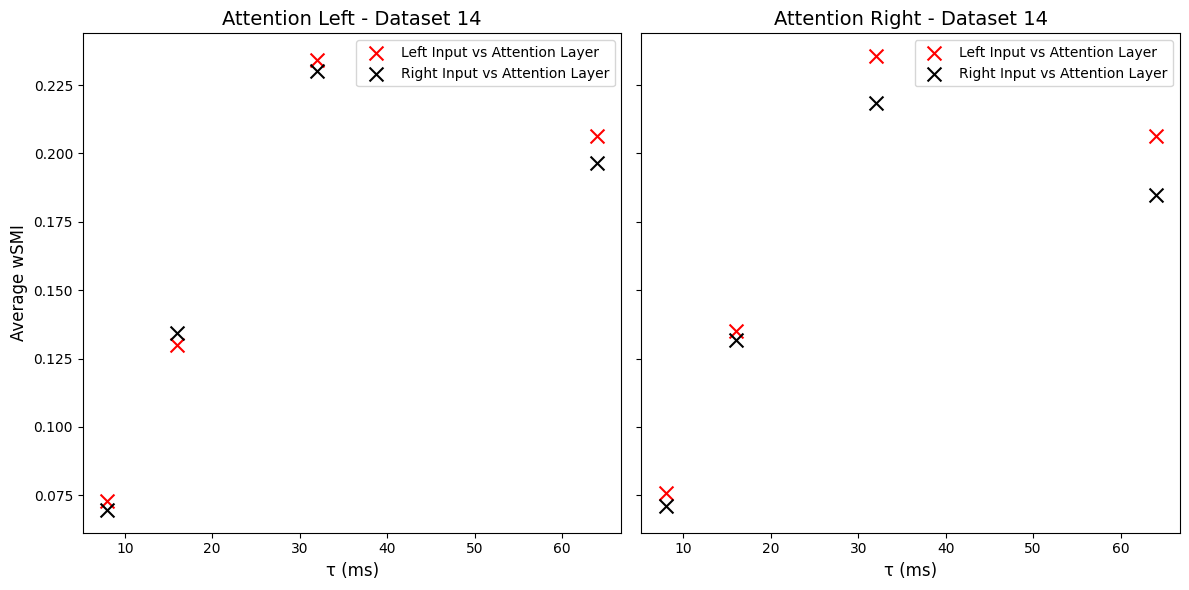

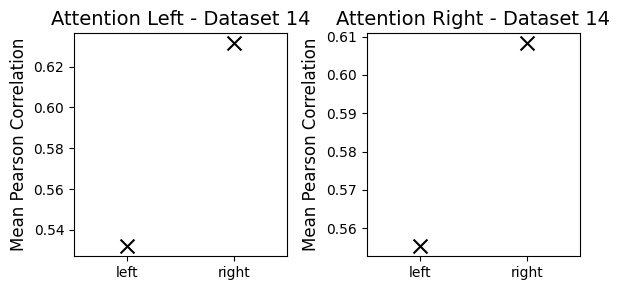

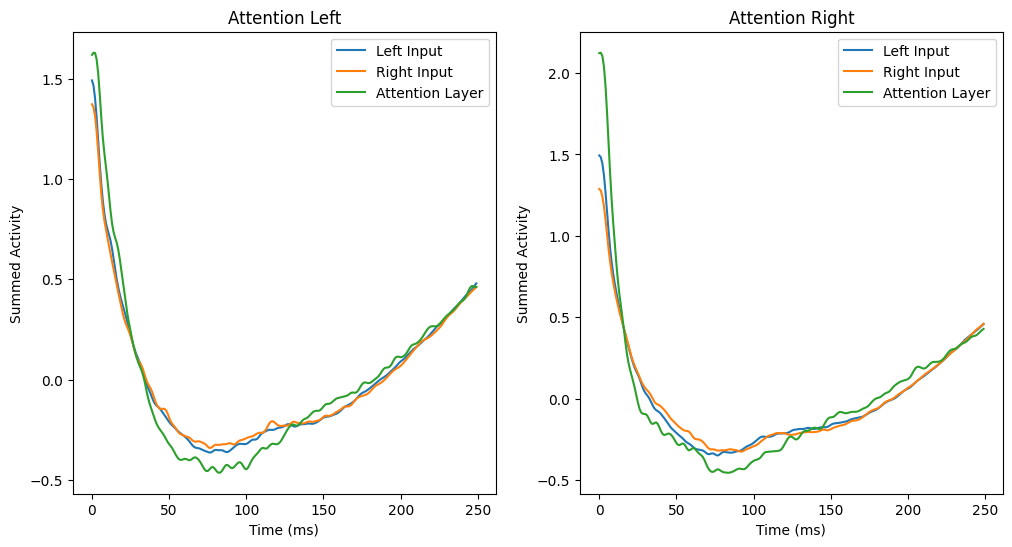

n_samples: 250

=== After Concatenation ===
After concatenation, shape: (1344, 250)
raw data right shape: (3, 131250)
[0.1   0.102 0.104 ... 0.346 0.348 0.35 ]
tau_samples for [8, 16, 32, 64]: [4, 8, 16, 32]


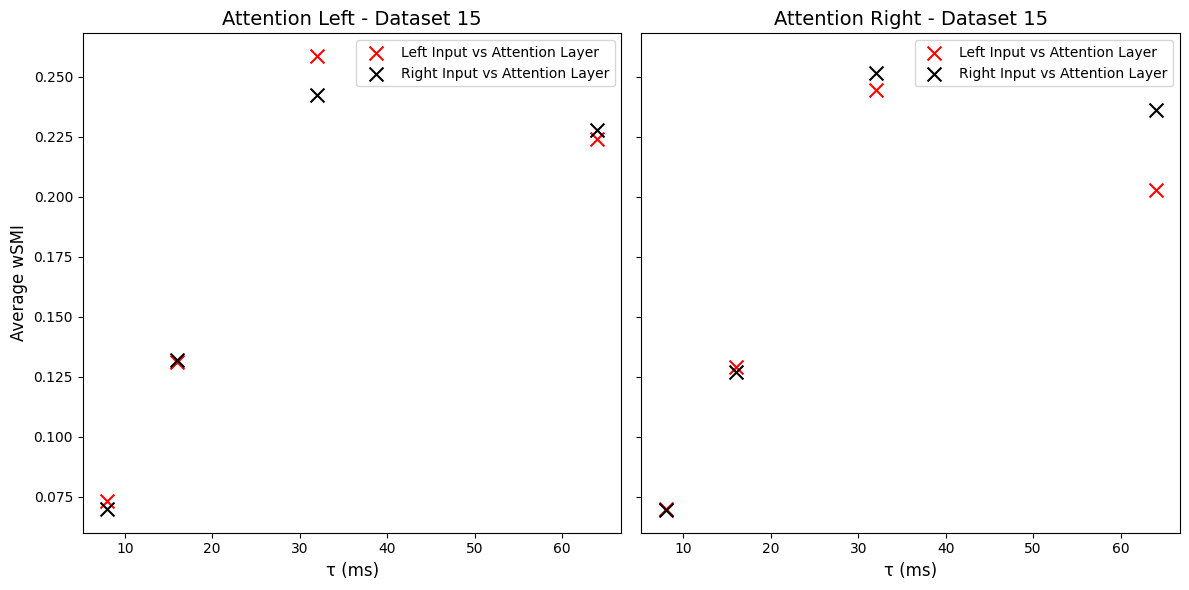

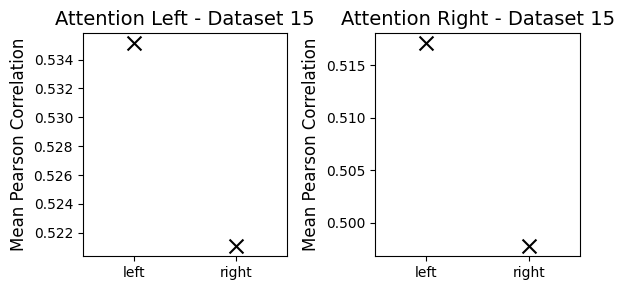

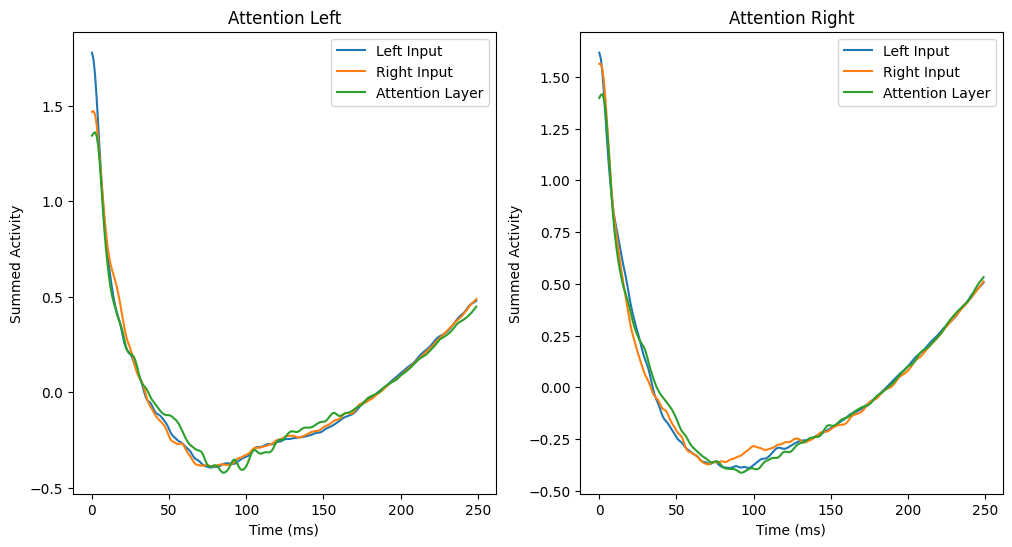

n_samples: 250

=== After Concatenation ===
After concatenation, shape: (1356, 250)
raw data right shape: (3, 126250)
[0.1   0.102 0.104 ... 0.346 0.348 0.35 ]
tau_samples for [8, 16, 32, 64]: [4, 8, 16, 32]


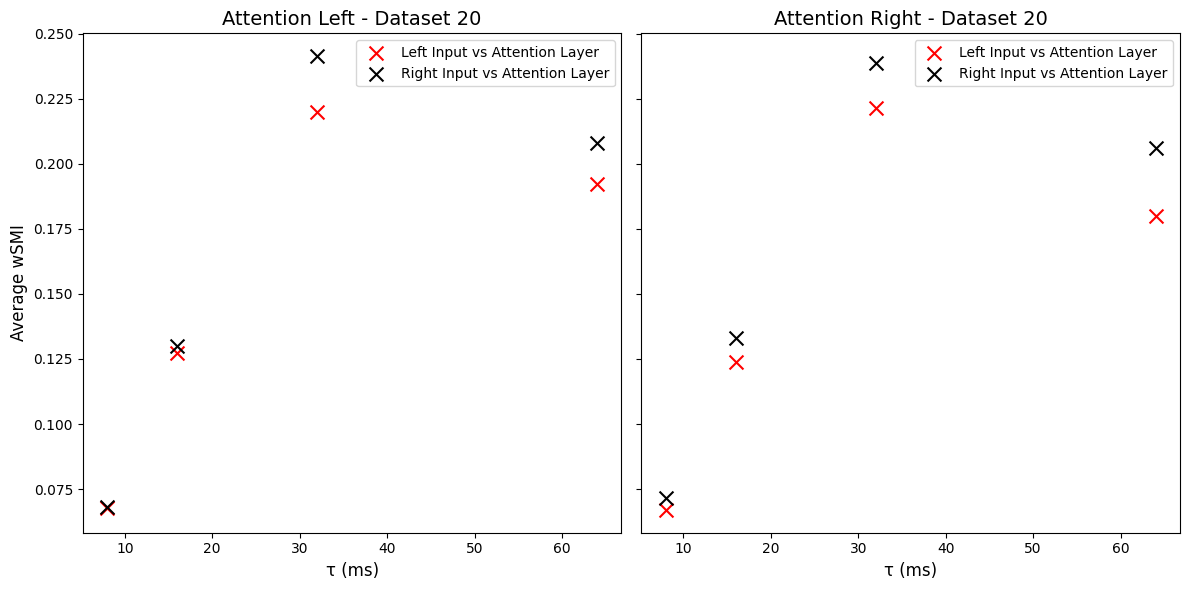

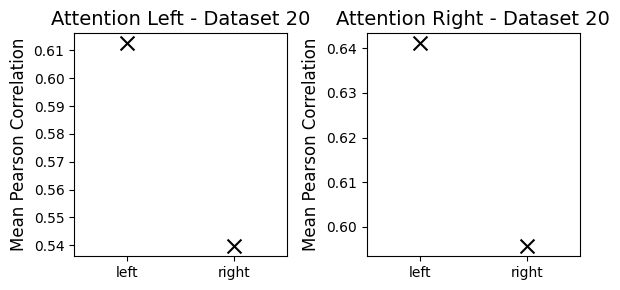

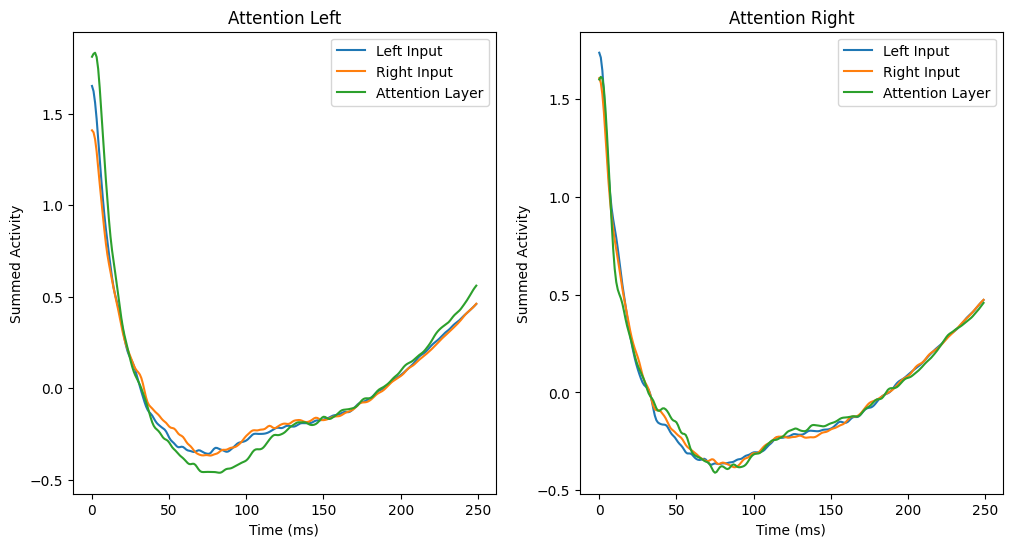

n_samples: 250

=== After Concatenation ===
After concatenation, shape: (1464, 250)
raw data right shape: (3, 124000)
[0.1   0.102 0.104 ... 0.346 0.348 0.35 ]
tau_samples for [8, 16, 32, 64]: [4, 8, 16, 32]


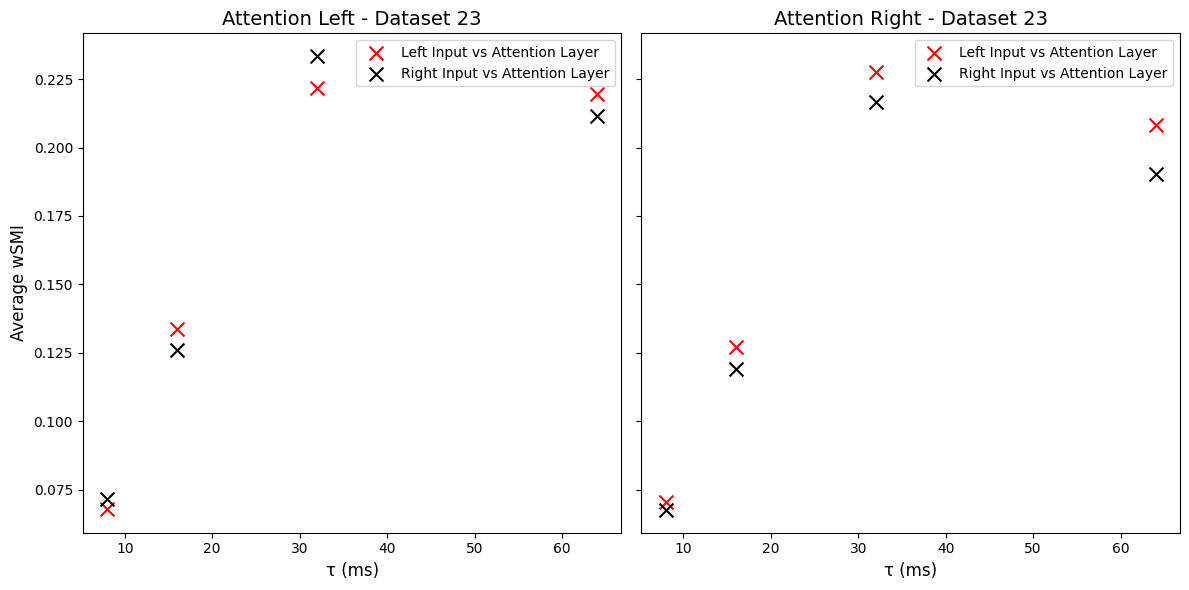

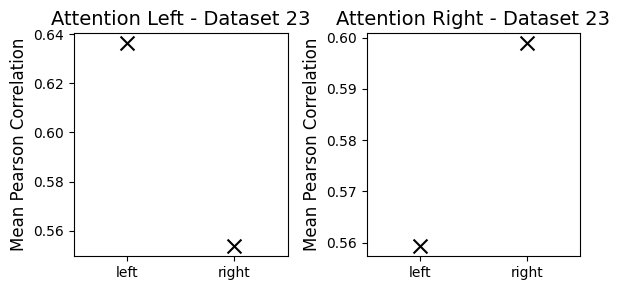

{'dataset_1': {'attention_left': {'larger wsmi': [0, 0, 1, 1], 'larger pearson': [0]}, 'attention_right': {'larger wsmi': [0, 1, 1, 1], 'larger pearson': [1]}}, 'dataset_2': {'attention_left': {'larger wsmi': [0, 0, 1, 1], 'larger pearson': [0]}, 'attention_right': {'larger wsmi': [1, 1, 0, 0], 'larger pearson': [1]}}, 'dataset_3': {'attention_left': {'larger wsmi': [0, 0, 1, 1], 'larger pearson': [0]}, 'attention_right': {'larger wsmi': [1, 1, 1, 1], 'larger pearson': [0]}}, 'dataset_4': {'attention_left': {'larger wsmi': [1, 1, 1, 1], 'larger pearson': [0]}, 'attention_right': {'larger wsmi': [1, 1, 1, 0], 'larger pearson': [0]}}, 'dataset_8': {'attention_left': {'larger wsmi': [0, 0, 0, 0], 'larger pearson': [0]}, 'attention_right': {'larger wsmi': [1, 0, 0, 0], 'larger pearson': [0]}}, 'dataset_14': {'attention_left': {'larger wsmi': [0, 1, 0, 0], 'larger pearson': [1]}, 'attention_right': {'larger wsmi': [0, 0, 0, 0], 'larger pearson': [1]}}, 'dataset_15': {'attention_left': {'lar

In [1]:
import numpy as np
import mne
import pickle
import matplotlib.pyplot as plt
from nice.algorithms.connectivity import epochs_compute_wsmi
np.set_printoptions(threshold=100)  
mne.set_log_level('WARNING')  
import warnings
warnings.filterwarnings("ignore")
from scipy.ndimage import gaussian_filter1d
from scipy.stats import zscore
from scipy.signal import detrend

#---this calculates wsmi and pearson for spiking data


i_values = [1, 2, 3, 4, 8, 14, 15, 20, 23]

results = {}
for store in i_values:
    results[f'dataset_{store}'] = {
        'attention_left': {
            'larger wsmi': [],
            'larger pearson': [],
      
        },
        'attention_right': {
            'larger wsmi': [],
            'larger pearson': [],
        
        }
    }


for file_number in i_values:
    # Load data

    file_path = f'C:/Users/joshu/PartIIIProject/RSNNdale_attention_{file_number}_attention_test'
    data = pickle.load(open(file_path, 'rb'))

    left_input_SP = data['SP'][0][0] 
    right_input_SP = data['SP'][0][1]
    attention_SP = data['SP'][0][2]
    label_left = data['label_left'][0]
    label_right = data['label_right'][0]
    # left_input_SP (2032, 500, 160)
    # right_input_SP (2032, 500, 160)
    # attention_SP (2032, 500, 80)
    

    attend_left_not_omitted = np.where((data["attend"][0] == 0) & (data["omit"][0] == 0) & (label_left != label_right))[0]
    attend_right_not_omitted = np.where((data["attend"][0] == 1) & (data["omit"][0] == 0) & (label_left != label_right))[0]

    # attend_left_not_omitted = np.where((data["attend"][0] == 0) & (data["omit"][0] == 0))[0]
    # attend_right_not_omitted = np.where((data["attend"][0] == 1) & (data["omit"][0] == 0))[0]

    left_input_attendingleft_t = left_input_SP[attend_left_not_omitted, 100:350, :]
    right_input_attendingleft_t = right_input_SP[attend_left_not_omitted, 100:350, :]
    attention_layer_attendingleft_t = attention_SP[attend_left_not_omitted, 100:350, :]

    left_input_attendingright_t = left_input_SP[attend_right_not_omitted, 100:350, :]
    right_input_attendingright_t = right_input_SP[attend_right_not_omitted, 100:350, :]
    attention_layer_attendingright_t = attention_SP[attend_right_not_omitted, 100:350, :]

    #eft_input_attendingleft_t (468, 250, 160) (80 for attention)
    #left_input_attendingright_t (536, 250, 160) (80 for attention)

    from scipy.ndimage import gaussian_filter1d

    def smooth_with_gaussian(data, sigma=3):
        return gaussian_filter1d(data, sigma=sigma, axis=1) 

    sigma = 2

    left_in_attleft_sm = smooth_with_gaussian(left_input_attendingleft_t, sigma=sigma) 
    right_in_attleft_sm = smooth_with_gaussian(right_input_attendingleft_t, sigma=sigma) 
    attlay_attleft_sm = smooth_with_gaussian(attention_layer_attendingleft_t, sigma=sigma) 

    left_in_attright_sm = smooth_with_gaussian(left_input_attendingright_t, sigma=sigma) 
    right_in_attright_sm = smooth_with_gaussian(right_input_attendingright_t, sigma=sigma)
    attlay_attright_sm = smooth_with_gaussian(attention_layer_attendingright_t, sigma=sigma)

    # #print shapes of each
    # print("left_in_attleft_sm", left_in_attleft_sm.shape)
    # print("right_in_attleft_sm", right_in_attleft_sm.shape)
    # print("attlay_attleft_sm", attlay_attleft_sm.shape)

    # print("=== Initial Smoothed Data ===")
    # print("left_in_attleft_sm shape:", left_in_attleft_sm.shape)
    # print("right_in_attleft_sm shape:", right_in_attleft_sm.shape)
    # print("attlay_attleft_sm shape:", attlay_attleft_sm.shape)

    # print("\nSnippet from left_in_attleft_sm (Trial 0, first 3 timepoints, first 5 neurons):")
    # print(left_in_attleft_sm[0, :, :5])

    num_trials_left, num_samples, num_neurons_left = left_input_attendingleft_t.shape
    num_trials_right = left_input_attendingright_t.shape[0]
    num_neurons_attention = 80

            
    for j in range(0, num_trials_left):
        for i in range(0, num_neurons_left):
            count_left = np.count_nonzero(left_input_attendingleft_t[j, :, i] == 1)
            if count_left > 0:
                left_in_attleft_sm[j, :, i] /= count_left
            count_right = np.count_nonzero(right_input_attendingleft_t[j, :, i] == 1)
            if count_right > 0:
                right_in_attleft_sm[j, :, i] /= count_right


        for i in range(0, num_neurons_attention):
            count_attention = np.count_nonzero(attention_layer_attendingleft_t[j, :, i] == 1)
            if count_attention > 0:
                attlay_attleft_sm[j, :, i] /= count_attention



    for j in range(0, num_trials_right):
        for i in range(0, num_neurons_left):
            count_left = np.count_nonzero(left_input_attendingright_t[j, :, i] == 1)
            if count_left > 0:
                left_in_attright_sm[j, :, i] /= count_left
            count_right = np.count_nonzero(right_input_attendingright_t[j, :, i] == 1)
            if count_right > 0:
                right_in_attright_sm[j, :, i] /= count_right    

        for i in range(0, num_neurons_attention):
            count_attention = np.count_nonzero(attention_layer_attendingright_t[j, :, i] == 1)
            if count_attention > 0:
                attlay_attright_sm[j, :, i] /= count_attention


        

    left_in_attleft_sum = np.sum(left_in_attleft_sm, axis=2)
    right_in_attleft_sum = np.sum(right_in_attleft_sm, axis=2)
    attlay_attleft_sum = np.sum(attlay_attleft_sm, axis=2)

    left_in_attright_sum = np.sum(left_in_attright_sm, axis=2)
    right_in_attright_sum = np.sum(right_in_attright_sm, axis=2)
    attlay_attright_sum = np.sum(attlay_attright_sm, axis=2)

   

    # Check for NaN or Inf values in the summed data
    def check_nan_inf(data, label):
        if np.isnan(data).any():
            print(f"NaN values found in {label}")
        if np.isinf(data).any():
            print(f"Inf values found in {label}")
        else:
            print(f"No NaN or Inf values found in {label}")

  
    for i in range(len(left_in_attleft_sm)):
        left_in_attleft_sum[i] = zscore(left_in_attleft_sum[i], axis=0)
        #left_in_attleft_sm[i] = np.nan_to_num(left_in_attleft_sm[i])  # Replace NaNs with 0
        right_in_attleft_sum[i] = zscore(right_in_attleft_sum[i], axis=0)
        #right_in_attleft_sm[i] = np.nan_to_num(right_in_attleft_sm[i])
        attlay_attleft_sum[i] = zscore(attlay_attleft_sum[i], axis=0)
        #attlay_attleft_sm[i] = np.nan_to_num(attlay_attleft_sm[i])

    for i in range(len(left_in_attright_sm)):
        left_in_attright_sum[i] = zscore(left_in_attright_sum[i], axis=0)
        #left_in_attright_sm[i] = np.nan_to_num(left_in_attright_sm[i])
        right_in_attright_sum[i] = zscore(right_in_attright_sum[i], axis=0)
        #right_in_attright_sm[i] = np.nan_to_num(right_in_attright_sm[i])
        attlay_attright_sum[i] = zscore(attlay_attright_sum[i], axis=0)
        #attlay_attright_sm[i] = np.nan_to_num(attlay_attright_sm[i])

    # print("\n=== Checking for NaN or Inf Values ===")
    # check_nan_inf(left_in_attleft_sum, "left_in_attleft_sum")
    # check_nan_inf(right_in_attleft_sum, "right_in_attleft_sum")
    # check_nan_inf(attlay_attleft_sum, "attlay_attleft_sum")
    # check_nan_inf(left_in_attright_sum, "left_in_attright_sum")
    # check_nan_inf(right_in_attright_sum, "right_in_attright_sum")
    # check_nan_inf(attlay_attright_sum, "attlay_attright_sum")

    


    for i in range(len(left_in_attleft_sm)):
        left_in_attleft_sum[i] = detrend(left_in_attleft_sum[i])
        right_in_attleft_sum[i] = detrend(right_in_attleft_sum[i])
        attlay_attleft_sum[i] = detrend(attlay_attleft_sum[i])

  
    for i in range(len(left_in_attright_sm)):
        left_in_attright_sum[i] = detrend(left_in_attright_sum[i])
        right_in_attright_sum[i] = detrend(right_in_attright_sum[i])
        attlay_attright_sum[i] = detrend(attlay_attright_sum[i])


    # print("\n=== After Summing Over Neurons ===")
    # print("left_in_attleft_sum shape:", left_in_attleft_sum.shape)
    # print("right_in_attleft_sum shape:", right_in_attleft_sum.shape)
    # print("attlay_attleft_sum shape:", attlay_attleft_sum.shape)

    

#balance sampling from class pairs
#standardise the data for mean 0 and std 1 to remove offsets 
#try linear detrend

      #plotting the mean across trials of all three data sets for when attention is left and right
    #can check here for linear trends, normalisation etc.
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    # Plot for Attention Left
    ax[0].plot(np.mean(left_in_attleft_sum, axis=0), label="Left Input")
    ax[0].plot(np.mean(right_in_attleft_sum, axis=0), label="Right Input")
    ax[0].plot(np.mean(attlay_attleft_sum, axis=0), label="Attention Layer")
    ax[0].set_title("Attention Left")
    ax[0].set_xlabel("Time (ms)")
    ax[0].set_ylabel("Summed Activity")
    ax[0].legend()

    # Plot for Attention Right
    ax[1].plot(np.mean(left_in_attright_sum, axis=0), label="Left Input")
    ax[1].plot(np.mean(right_in_attright_sum, axis=0), label="Right Input")
    ax[1].plot(np.mean(attlay_attright_sum, axis=0), label="Attention Layer")
    ax[1].set_title("Attention Right")
    ax[1].set_xlabel("Time (ms)")
    ax[1].set_ylabel("Summed Activity")
    ax[1].legend()

    plt.show()
    ## see a decaying exponential for this data when you dont zscore and detrend


   
    n_samples = left_in_attleft_sum.shape[1]   ##change this for correct time 
    print("n_samples:", n_samples)

    dt = 0.002
    sfreq = 1 / dt  # Sampling frequency

    ch_names = ['left_input', 'right_input', 'attention_layer']
    ch_types = ['eeg', 'eeg', 'eeg']
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

    # print("Left shape:", left_in_attleft_sum.shape)
    # print("Right shape:", right_in_attleft_sum.shape)
    # print("Attention shape:", attlay_attleft_sum.shape)


    #reshaping data for attention left
    raw_data_left = np.concatenate([
        left_in_attleft_sum, 
        right_in_attleft_sum, 
        attlay_attleft_sum
    ], axis=0)  # Concatenate along time axis

    print("\n=== After Concatenation ===")
    print("After concatenation, shape:", raw_data_left.shape)
    # Expecting shape: (495 + 495 + 495 = 1485, 250)
    #Print a snippet from the concatenated data:
    # (First 5 rows, first 10 timepoints)


    # Reshape into (n_channels, n_samples)
    raw_data_left = raw_data_left.reshape(3, -1)
    # print('raw data left shape:', raw_data_left.shape)
    # print("\nSnippet from raw_data_concat (first 5 rows, first 10 timepoints):")
    # print(raw_data_left[:5, :10])


    raw_left = mne.io.RawArray(raw_data_left, info)

    # print("\n=== Visual Inspection of Each Channel ===")
    # print("Channel 0 (Left Input) - first 20 samples:")
    # print(raw_data_left[0, :20])
    # print("\nChannel 1 (Right Input) - first 20 samples:")
    # print(raw_data_left[1, :20])
    # print("\nChannel 2 (Attention Layer) - first 20 samples:")
    # print(raw_data_left[2, :20])

    #reshaping data for attention right
    raw_data_right = np.concatenate([
        left_in_attright_sum, 
        right_in_attright_sum, 
        attlay_attright_sum
    ], axis=0)  # Concatenate along time axis

    # Reshape into (n_channels, n_samples)
    raw_data_right = raw_data_right.reshape(3, -1)
    print('raw data right shape:', raw_data_right.shape)

    raw_right = mne.io.RawArray(raw_data_right, info)


    events_left = np.array([[i * n_samples, 0, 1] for i in range(len(attend_left_not_omitted))])
    events_right = np.array([[i * n_samples, 0, 1] for i in range(len(attend_right_not_omitted))])

    epochs_left = mne.Epochs(raw_left, events_left, event_id={'Trial': 1}, tmin = 0.1, tmax = 0.35,detrend = 1, baseline=None, preload=True)
    epochs_right = mne.Epochs(raw_right, events_right, event_id={'Trial': 1}, tmin = 0.1, tmax = 0.35,detrend = 1, baseline=None, preload=True)
    print(epochs_right.times)
    #epochs_left.plot(n_epochs=5, n_channels=3, scalings = '1', title="Attention Left")
    #plt.show()


    #wSMI for each condition
    kernel = 3
    taus = [8, 16, 32, 64]  # in ms
    wsmi_results = {'left': {}, 'right': {}}


    print(f"tau_samples for {taus}: {[int(t / (1000 / sfreq)) for t in taus]}")

    for tau_ms in taus:
        tau_samples = int(tau_ms / (1000 / sfreq))  # Convert ms to samples
        

        #wSMI for attention left
        wsmi_left, _, _, _ = epochs_compute_wsmi(
            epochs_left, kernel=kernel, tau=tau_samples, backend='python', method_params={'bypass_csd': True}
        )
        wsmi_results['left'][tau_ms] = wsmi_left
        

        #wSMI for attention right
        wsmi_right, _, _, _ = epochs_compute_wsmi(
            epochs_right, kernel=kernel, tau=tau_samples, backend='python', method_params={'bypass_csd': True}
        )
        wsmi_results['right'][tau_ms] = wsmi_right


    wsmi_left_input_left = []  #wSMI for left input vs attention layer (attention left)
    wsmi_right_input_left = []  #wSMI for right input vs attention layer (attention left)
    wsmi_left_input_right = []  #wSMI for left input vs attention layer (attention right)
    wsmi_right_input_right = []  #wSMI for right input vs attention layer (attention right)

    #average wSMI for each τ for each condition
    for tau in taus:
        # For attention left
        wsmi_left_input_left.append(np.mean(wsmi_results['left'][tau][0, 2, :]))  # Left input vs attention layer
        wsmi_right_input_left.append(np.mean(wsmi_results['left'][tau][1, 2, :]))  # Right input vs attention layer

        # For attention right
        wsmi_left_input_right.append(np.mean(wsmi_results['right'][tau][0, 2, :]))  # Left input vs attention layer
        wsmi_right_input_right.append(np.mean(wsmi_results['right'][tau][1, 2, :]))  # Right input vs attention layer
 
    for tau in taus:
        if wsmi_left_input_left[taus.index(tau)] > wsmi_right_input_left[taus.index(tau)]:
            results[f'dataset_{file_number}']['attention_left']['larger wsmi'].append(0)
        else:
            results[f'dataset_{file_number}']['attention_left']['larger wsmi'].append(1)

        if wsmi_left_input_right[taus.index(tau)] > wsmi_right_input_right[taus.index(tau)]:
            results[f'dataset_{file_number}']['attention_right']['larger wsmi'].append(0)
        else:
            results[f'dataset_{file_number}']['attention_right']['larger wsmi'].append(1)

    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    #left subplot
    axs[0].scatter(taus, wsmi_left_input_left, label="Left Input vs Attention Layer", marker="x",color = 'r', s=100)
    axs[0].scatter(taus, wsmi_right_input_left, label="Right Input vs Attention Layer", marker="x",color = 'k', s=100)
    axs[0].set_title(f"Attention Left - Dataset {file_number}", fontsize=14)
    axs[0].set_xlabel("τ (ms)", fontsize=12)
    axs[0].set_ylabel("Average wSMI", fontsize=12)
    axs[0].legend()
    axs[0].grid(False)

    #right subplot
    axs[1].scatter(taus, wsmi_left_input_right, label="Left Input vs Attention Layer", marker="x", color = 'r', s=100)
    axs[1].scatter(taus, wsmi_right_input_right, label="Right Input vs Attention Layer", marker="x",color = 'k', s=100)
    axs[1].set_title(f"Attention Right - Dataset {file_number}", fontsize=14)
    axs[1].set_xlabel("τ (ms)", fontsize=12)
    axs[1].legend()
    axs[1].grid(False)

    plt.tight_layout()
    plt.show()


    # for tau_to_check in taus:

    #     # Extract the wSMI matrix for the first trial (attention left)
    #     wsmi_first_trial_left = wsmi_results['left'][tau_to_check][:, :, 0]  # 0 corresponds to the first trial

    #     # Print the result
    #     print(f"wSMI matrix for the first trial (attention left) at tau={tau_to_check} ms:\n", wsmi_first_trial_left)



    from scipy.stats import pearsonr

    attleft_pearson_left = []
    attleft_pearson_right = []
    attright_pearson_left = []
    attright_pearson_right = []


    for i in range(len(attend_left_not_omitted)):
        corr_left, _ = pearsonr(left_in_attleft_sum[i], attlay_attleft_sum[i])
        attleft_pearson_left.append(corr_left)
        corr_right, _ = pearsonr(right_in_attleft_sum[i], attlay_attleft_sum[i])
        attleft_pearson_right.append(corr_right)

    for i in range(len(attend_right_not_omitted)):
        corr_left, _ = pearsonr(left_in_attright_sum[i], attlay_attright_sum[i])
        attright_pearson_left.append(corr_left)
        corr_right, _ = pearsonr(right_in_attright_sum[i], attlay_attright_sum[i])
        attright_pearson_right.append(corr_right)
 

    mean_corr_left_attleft = np.mean(attleft_pearson_left)
    mean_corr_right_attleft = np.mean(attleft_pearson_right)
    mean_corr_left_attright = np.mean(attright_pearson_left)
    mean_corr_right_attright = np.mean(attright_pearson_right)

    if mean_corr_left_attleft > mean_corr_right_attleft:
        results[f'dataset_{file_number}']['attention_left']['larger pearson'].append(0)
    else:
        results[f'dataset_{file_number}']['attention_left']['larger pearson'].append(1)

    if mean_corr_left_attright > mean_corr_right_attright:
        results[f'dataset_{file_number}']['attention_right']['larger pearson'].append(0)
    else:
        results[f'dataset_{file_number}']['attention_right']['larger pearson'].append(1)



    # Instead of x_axis = ['left', 'right'], use numeric x positions:
    x = [0, 1]

    # Create your figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))

    # Plot using the numeric x positions
    axs[0].scatter(x, [mean_corr_left_attleft, mean_corr_right_attleft],
                label="Attention Left", color='k', marker='x', s=100)
    axs[1].scatter(x, [mean_corr_left_attright, mean_corr_right_attright],
                label="Attention Right", color='k', marker='x', s=100)

    # Set x-tick positions and labels for each subplot
    for ax in axs:
        ax.set_xticks(x)
        ax.set_xticklabels(['left', 'right'])
        # Optionally, adjust x-limits to make the points closer to the center:
        ax.set_xlim(-0.5, 1.5)

    axs[0].set_title(f"Attention Left - Dataset {file_number}", fontsize=14)
    axs[1].set_title(f"Attention Right - Dataset {file_number}", fontsize=14)
    axs[0].set_ylabel("Mean Pearson Correlation", fontsize=12)
    axs[1].set_ylabel("Mean Pearson Correlation", fontsize=12)

    axs[0].grid(False)
    axs[1].grid(False)

    plt.tight_layout()
    plt.show()


print(results)


n_samples: 250

=== After Concatenation ===
After concatenation, shape: (1404, 250)
raw data right shape: (3, 134000)
[0.1   0.102 0.104 ... 0.346 0.348 0.35 ]
tau_samples for [8, 16, 32, 64]: [4, 8, 16, 32]


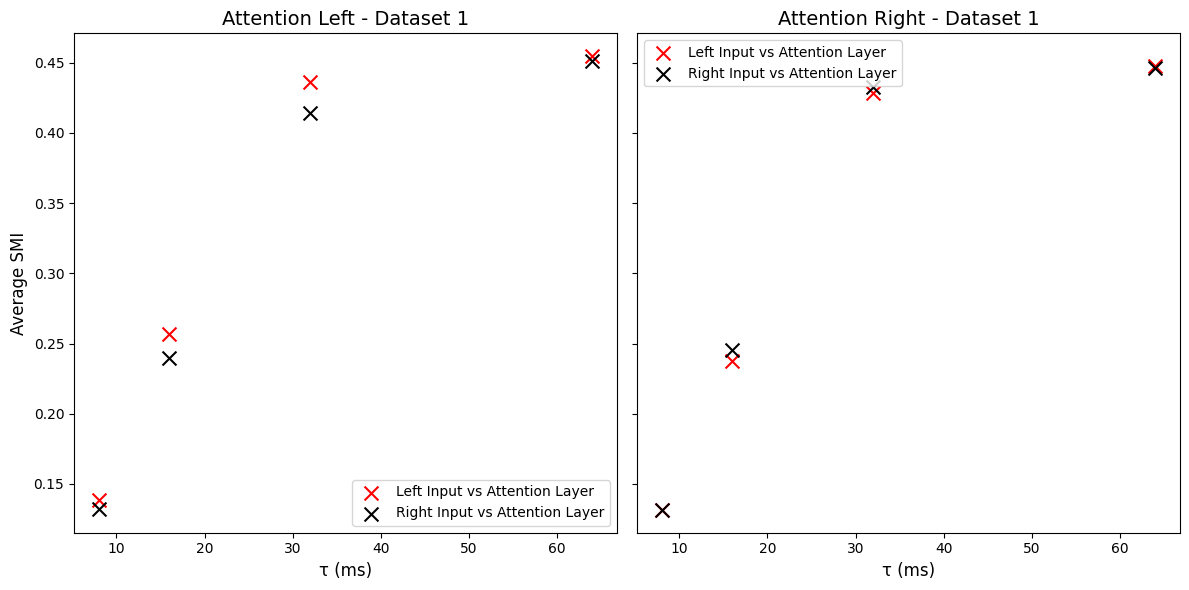

n_samples: 250

=== After Concatenation ===
After concatenation, shape: (1389, 250)
raw data right shape: (3, 119750)
[0.1   0.102 0.104 ... 0.346 0.348 0.35 ]
tau_samples for [8, 16, 32, 64]: [4, 8, 16, 32]


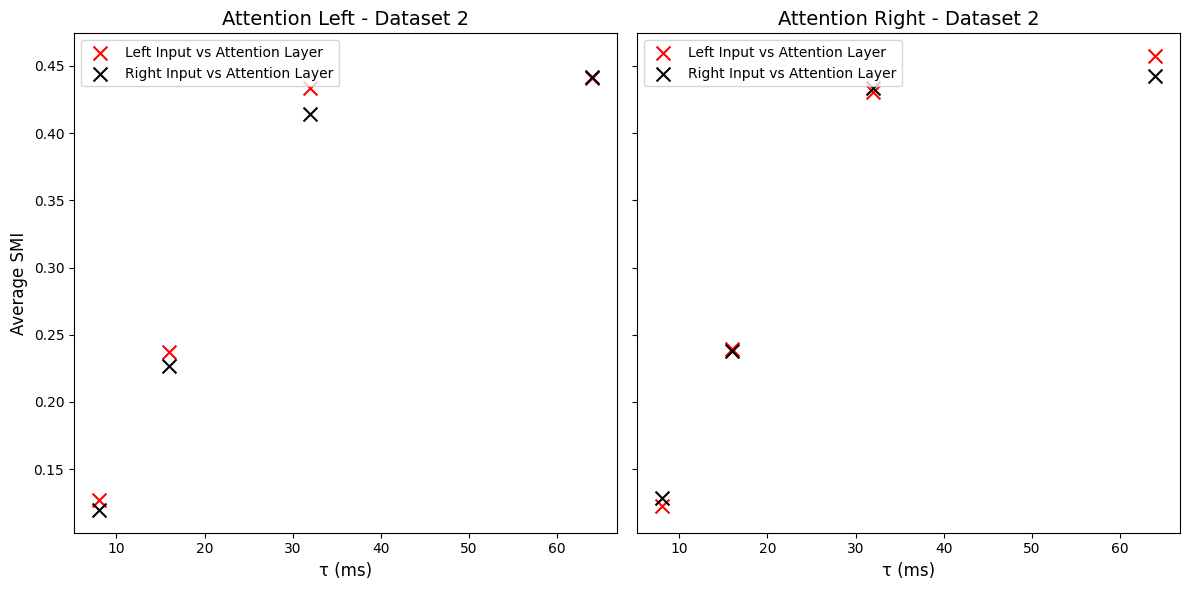

n_samples: 250

=== After Concatenation ===
After concatenation, shape: (1401, 250)
raw data right shape: (3, 125250)
[0.1   0.102 0.104 ... 0.346 0.348 0.35 ]
tau_samples for [8, 16, 32, 64]: [4, 8, 16, 32]


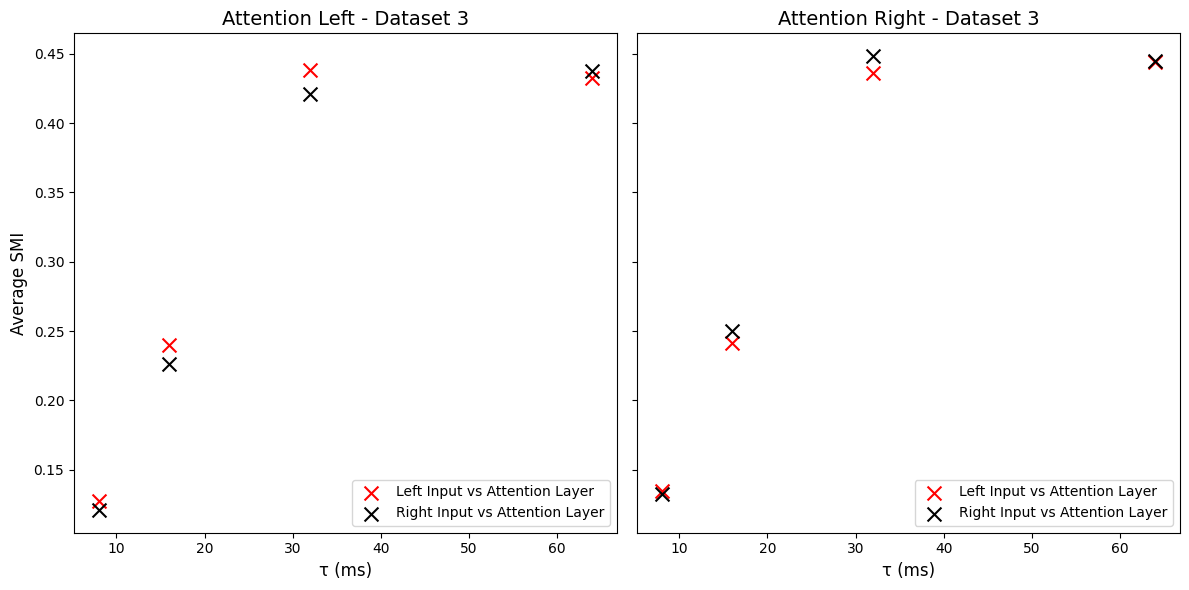

n_samples: 250

=== After Concatenation ===
After concatenation, shape: (1413, 250)
raw data right shape: (3, 113750)
[0.1   0.102 0.104 ... 0.346 0.348 0.35 ]
tau_samples for [8, 16, 32, 64]: [4, 8, 16, 32]


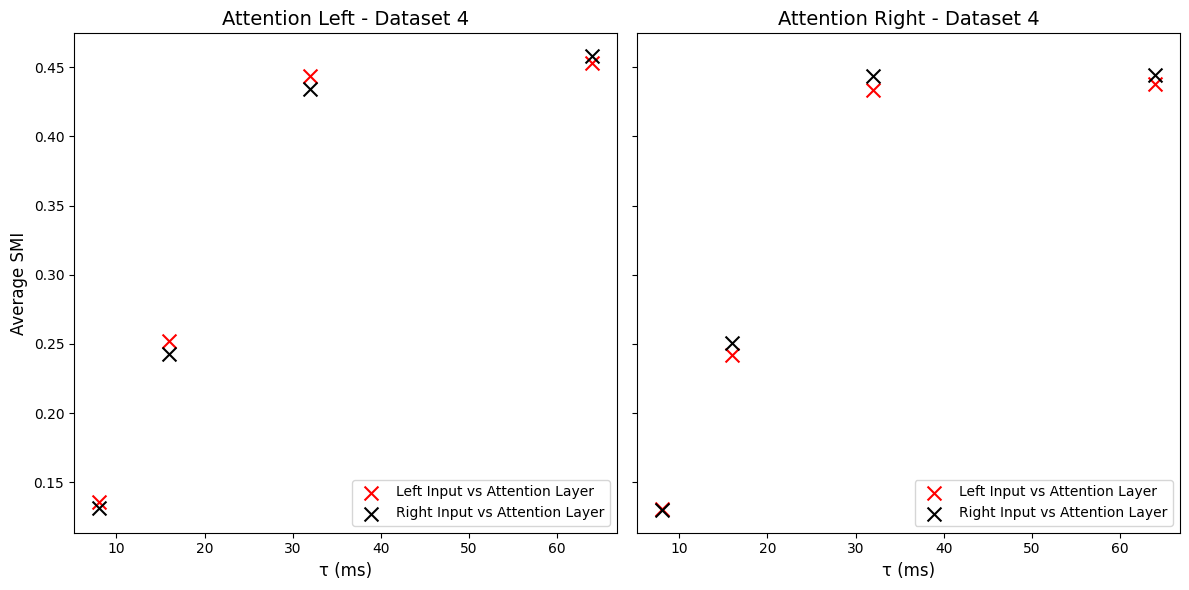

n_samples: 250

=== After Concatenation ===
After concatenation, shape: (1476, 250)
raw data right shape: (3, 118250)
[0.1   0.102 0.104 ... 0.346 0.348 0.35 ]
tau_samples for [8, 16, 32, 64]: [4, 8, 16, 32]


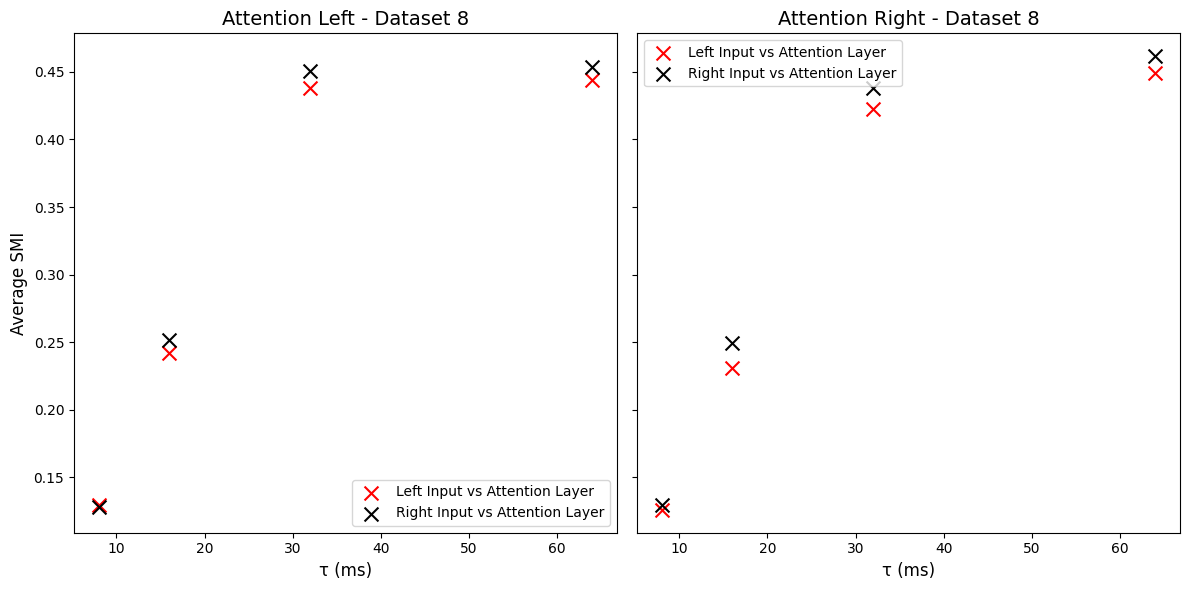

n_samples: 250

=== After Concatenation ===
After concatenation, shape: (1509, 250)
raw data right shape: (3, 117750)
[0.1   0.102 0.104 ... 0.346 0.348 0.35 ]
tau_samples for [8, 16, 32, 64]: [4, 8, 16, 32]


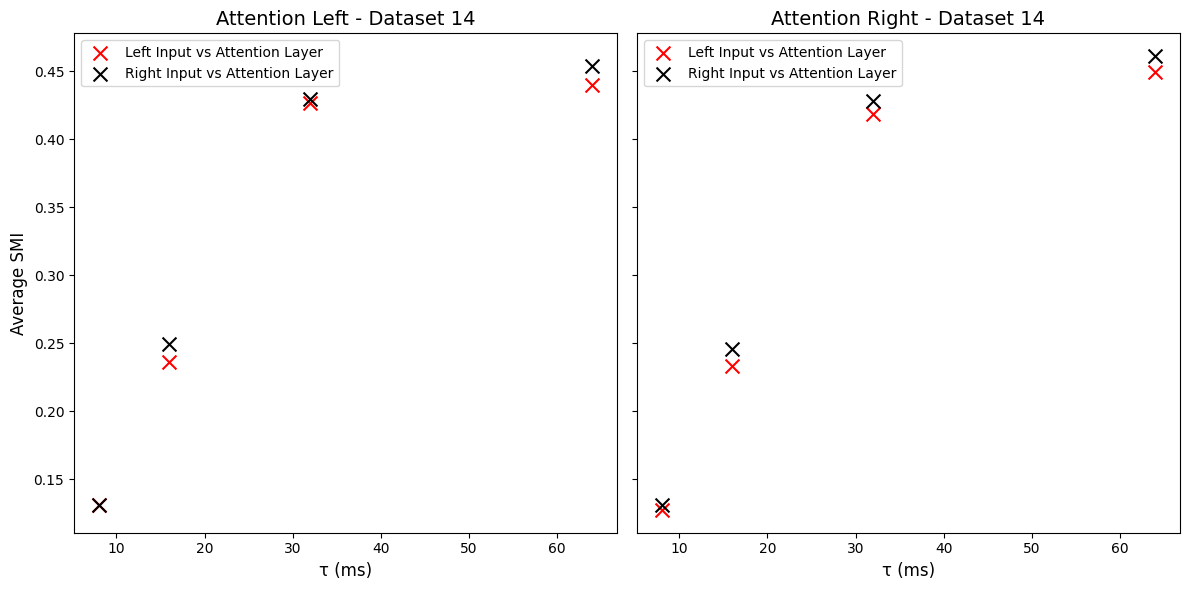

n_samples: 250

=== After Concatenation ===
After concatenation, shape: (1344, 250)
raw data right shape: (3, 131250)
[0.1   0.102 0.104 ... 0.346 0.348 0.35 ]
tau_samples for [8, 16, 32, 64]: [4, 8, 16, 32]


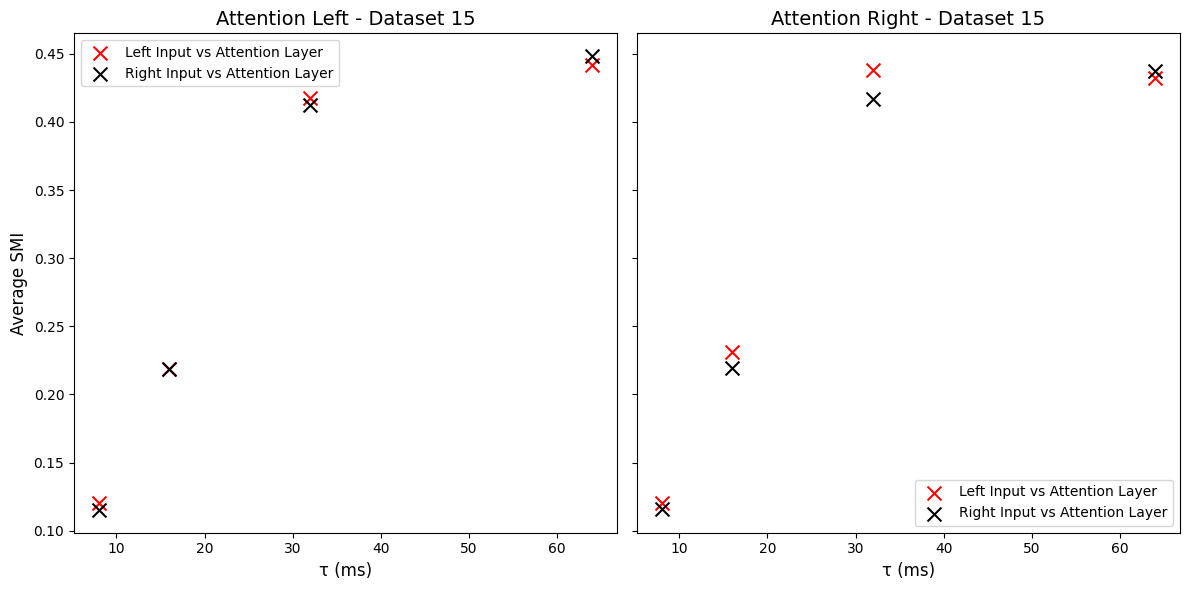

n_samples: 250

=== After Concatenation ===
After concatenation, shape: (1356, 250)
raw data right shape: (3, 126250)
[0.1   0.102 0.104 ... 0.346 0.348 0.35 ]
tau_samples for [8, 16, 32, 64]: [4, 8, 16, 32]


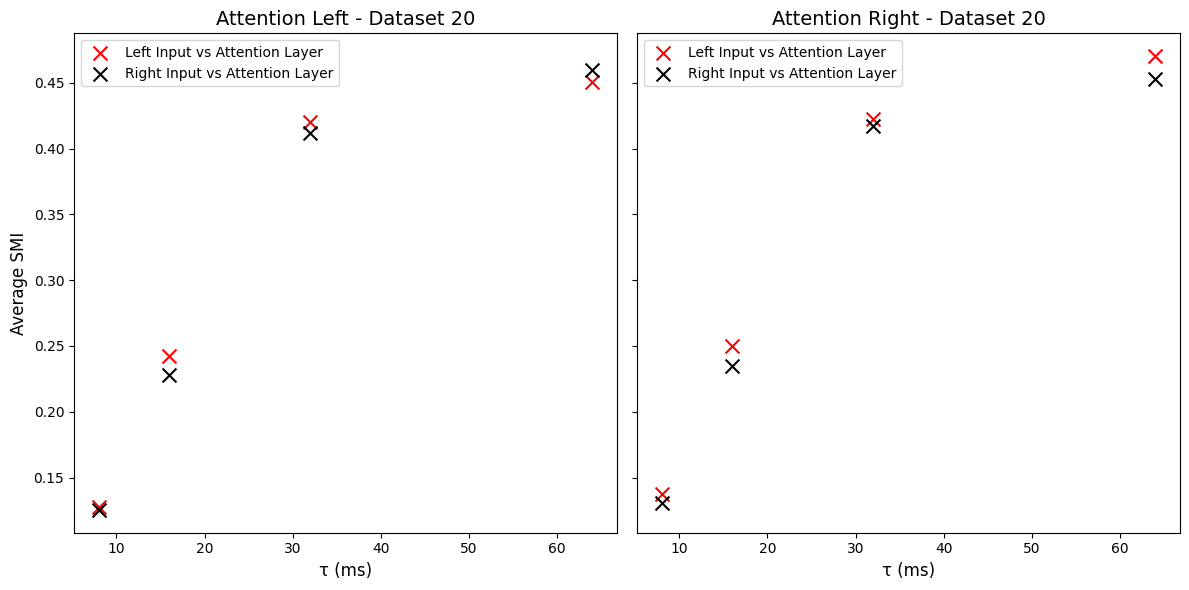

n_samples: 250

=== After Concatenation ===
After concatenation, shape: (1464, 250)
raw data right shape: (3, 124000)
[0.1   0.102 0.104 ... 0.346 0.348 0.35 ]
tau_samples for [8, 16, 32, 64]: [4, 8, 16, 32]


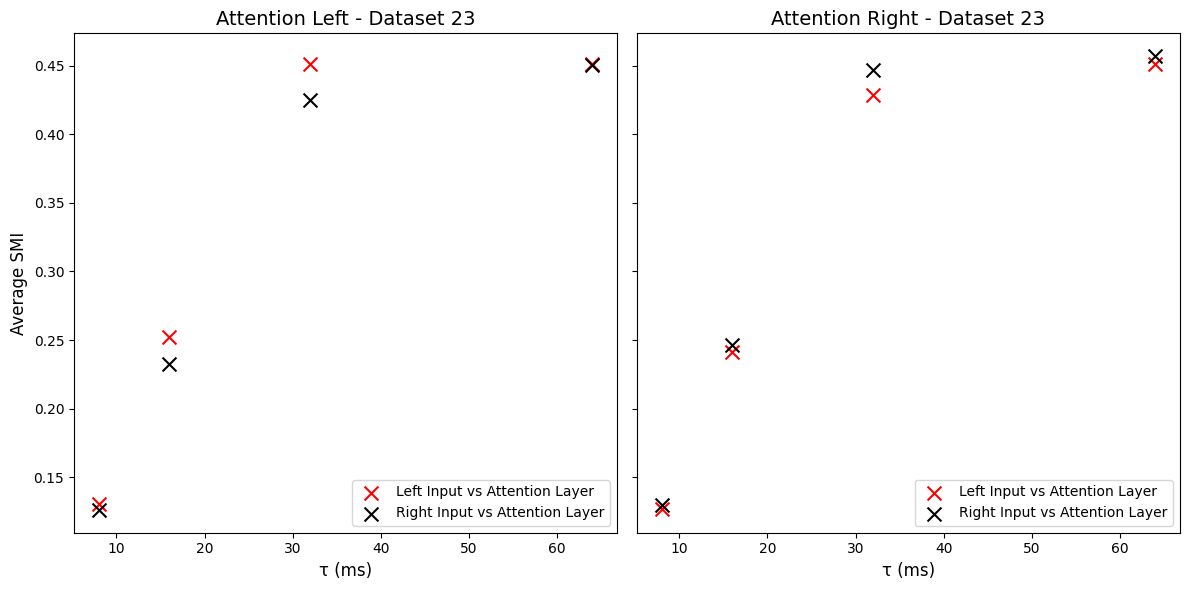

{'dataset_1': {'attention_left': {'larger smi': [0, 0, 0, 0], 'larger pearson': []}, 'attention_right': {'larger smi': [1, 1, 1, 0], 'larger pearson': []}}, 'dataset_2': {'attention_left': {'larger smi': [0, 0, 0, 1], 'larger pearson': []}, 'attention_right': {'larger smi': [1, 0, 1, 0], 'larger pearson': []}}, 'dataset_3': {'attention_left': {'larger smi': [0, 0, 0, 1], 'larger pearson': []}, 'attention_right': {'larger smi': [0, 1, 1, 1], 'larger pearson': []}}, 'dataset_4': {'attention_left': {'larger smi': [0, 0, 0, 1], 'larger pearson': []}, 'attention_right': {'larger smi': [0, 1, 1, 1], 'larger pearson': []}}, 'dataset_8': {'attention_left': {'larger smi': [0, 1, 1, 1], 'larger pearson': []}, 'attention_right': {'larger smi': [1, 1, 1, 1], 'larger pearson': []}}, 'dataset_14': {'attention_left': {'larger smi': [1, 1, 1, 1], 'larger pearson': []}, 'attention_right': {'larger smi': [1, 1, 1, 1], 'larger pearson': []}}, 'dataset_15': {'attention_left': {'larger smi': [0, 0, 0, 1], 

In [5]:
import numpy as np
import mne
import pickle
import matplotlib.pyplot as plt
from nice.algorithms.connectivity import epochs_compute_wsmi
np.set_printoptions(threshold=100)  # Default threshold
mne.set_log_level('WARNING') 
import warnings
warnings.filterwarnings("ignore")
from scipy.ndimage import gaussian_filter1d
from scipy.stats import zscore
from scipy.signal import detrend

#---this calculates smi and pearson for spiking data


i_values = [1, 2, 3, 4, 8, 14, 15, 20, 23]

results = {}
for store in i_values:
    results[f'dataset_{store}'] = {
        'attention_left': {
            'larger smi': [],
            'larger pearson': [],
      
        },
        'attention_right': {
            'larger smi': [],
            'larger pearson': [],
        
        }
    }


for file_number in i_values:
    # Load data

    file_path = f'C:/Users/joshu/PartIIIProject/RSNNdale_attention_{file_number}_attention_test'
    data = pickle.load(open(file_path, 'rb'))

    left_input_SP = data['SP'][0][0] 
    right_input_SP = data['SP'][0][1]
    attention_SP = data['SP'][0][2]
    label_left = data['label_left'][0]
    label_right = data['label_right'][0]
    # left_input_SP (2032, 500, 160)
    # right_input_SP (2032, 500, 160)
    # attention_SP (2032, 500, 80)
    

    attend_left_not_omitted = np.where((data["attend"][0] == 0) & (data["omit"][0] == 0) & (label_left != label_right))[0]
    attend_right_not_omitted = np.where((data["attend"][0] == 1) & (data["omit"][0] == 0) & (label_left != label_right))[0]

    # attend_left_not_omitted = np.where((data["attend"][0] == 0) & (data["omit"][0] == 0))[0]
    # attend_right_not_omitted = np.where((data["attend"][0] == 1) & (data["omit"][0] == 0))[0]

    left_input_attendingleft_t = left_input_SP[attend_left_not_omitted, 100:350, :]
    right_input_attendingleft_t = right_input_SP[attend_left_not_omitted, 100:350, :]
    attention_layer_attendingleft_t = attention_SP[attend_left_not_omitted, 100:350, :]

    left_input_attendingright_t = left_input_SP[attend_right_not_omitted, 100:350, :]
    right_input_attendingright_t = right_input_SP[attend_right_not_omitted, 100:350, :]
    attention_layer_attendingright_t = attention_SP[attend_right_not_omitted, 100:350, :]

    #eft_input_attendingleft_t (468, 250, 160) (80 for attention)
    #left_input_attendingright_t (536, 250, 160) (80 for attention)

    from scipy.ndimage import gaussian_filter1d

    def smooth_with_gaussian(data, sigma=3):
        return gaussian_filter1d(data, sigma=sigma, axis=1) 

    sigma = 2

    left_in_attleft_sm = smooth_with_gaussian(left_input_attendingleft_t, sigma=sigma) 
    right_in_attleft_sm = smooth_with_gaussian(right_input_attendingleft_t, sigma=sigma) 
    attlay_attleft_sm = smooth_with_gaussian(attention_layer_attendingleft_t, sigma=sigma) 

    left_in_attright_sm = smooth_with_gaussian(left_input_attendingright_t, sigma=sigma) 
    right_in_attright_sm = smooth_with_gaussian(right_input_attendingright_t, sigma=sigma)
    attlay_attright_sm = smooth_with_gaussian(attention_layer_attendingright_t, sigma=sigma)

    # #print shapes of each
    # print("left_in_attleft_sm", left_in_attleft_sm.shape)
    # print("right_in_attleft_sm", right_in_attleft_sm.shape)
    # print("attlay_attleft_sm", attlay_attleft_sm.shape)

    # print("=== Initial Smoothed Data ===")
    # print("left_in_attleft_sm shape:", left_in_attleft_sm.shape)
    # print("right_in_attleft_sm shape:", right_in_attleft_sm.shape)
    # print("attlay_attleft_sm shape:", attlay_attleft_sm.shape)

    # print("\nSnippet from left_in_attleft_sm (Trial 0, first 3 timepoints, first 5 neurons):")
    # print(left_in_attleft_sm[0, :, :5])

    num_trials_left, num_samples, num_neurons_left = left_input_attendingleft_t.shape
    num_trials_right = left_input_attendingright_t.shape[0]
    num_neurons_attention = 80

            
    for j in range(0, num_trials_left):
        for i in range(0, num_neurons_left):
            count_left = np.count_nonzero(left_input_attendingleft_t[j, :, i] == 1)
            if count_left > 0:
                left_in_attleft_sm[j, :, i] /= count_left
            count_right = np.count_nonzero(right_input_attendingleft_t[j, :, i] == 1)
            if count_right > 0:
                right_in_attleft_sm[j, :, i] /= count_right


        for i in range(0, num_neurons_attention):
            count_attention = np.count_nonzero(attention_layer_attendingleft_t[j, :, i] == 1)
            if count_attention > 0:
                attlay_attleft_sm[j, :, i] /= count_attention



    for j in range(0, num_trials_right):
        for i in range(0, num_neurons_left):
            count_left = np.count_nonzero(left_input_attendingright_t[j, :, i] == 1)
            if count_left > 0:
                left_in_attright_sm[j, :, i] /= count_left
            count_right = np.count_nonzero(right_input_attendingright_t[j, :, i] == 1)
            if count_right > 0:
                right_in_attright_sm[j, :, i] /= count_right    

        for i in range(0, num_neurons_attention):
            count_attention = np.count_nonzero(attention_layer_attendingright_t[j, :, i] == 1)
            if count_attention > 0:
                attlay_attright_sm[j, :, i] /= count_attention


        

    left_in_attleft_sum = np.sum(left_in_attleft_sm, axis=2)
    right_in_attleft_sum = np.sum(right_in_attleft_sm, axis=2)
    attlay_attleft_sum = np.sum(attlay_attleft_sm, axis=2)

    left_in_attright_sum = np.sum(left_in_attright_sm, axis=2)
    right_in_attright_sum = np.sum(right_in_attright_sm, axis=2)
    attlay_attright_sum = np.sum(attlay_attright_sm, axis=2)

   

    # Check for NaN or Inf values in the summed data
    def check_nan_inf(data, label):
        if np.isnan(data).any():
            print(f"NaN values found in {label}")
        if np.isinf(data).any():
            print(f"Inf values found in {label}")
        else:
            print(f"No NaN or Inf values found in {label}")

  
    for i in range(len(left_in_attleft_sm)):
        left_in_attleft_sum[i] = zscore(left_in_attleft_sum[i], axis=0)
        #left_in_attleft_sm[i] = np.nan_to_num(left_in_attleft_sm[i])  # Replace NaNs with 0
        right_in_attleft_sum[i] = zscore(right_in_attleft_sum[i], axis=0)
        #right_in_attleft_sm[i] = np.nan_to_num(right_in_attleft_sm[i])
        attlay_attleft_sum[i] = zscore(attlay_attleft_sum[i], axis=0)
        #attlay_attleft_sm[i] = np.nan_to_num(attlay_attleft_sm[i])

    for i in range(len(left_in_attright_sm)):
        left_in_attright_sum[i] = zscore(left_in_attright_sum[i], axis=0)
        #left_in_attright_sm[i] = np.nan_to_num(left_in_attright_sm[i])
        right_in_attright_sum[i] = zscore(right_in_attright_sum[i], axis=0)
        #right_in_attright_sm[i] = np.nan_to_num(right_in_attright_sm[i])
        attlay_attright_sum[i] = zscore(attlay_attright_sum[i], axis=0)
        #attlay_attright_sm[i] = np.nan_to_num(attlay_attright_sm[i])

    # print("\n=== Checking for NaN or Inf Values ===")
    # check_nan_inf(left_in_attleft_sum, "left_in_attleft_sum")
    # check_nan_inf(right_in_attleft_sum, "right_in_attleft_sum")
    # check_nan_inf(attlay_attleft_sum, "attlay_attleft_sum")
    # check_nan_inf(left_in_attright_sum, "left_in_attright_sum")
    # check_nan_inf(right_in_attright_sum, "right_in_attright_sum")
    # check_nan_inf(attlay_attright_sum, "attlay_attright_sum")

    


    for i in range(len(left_in_attleft_sm)):
        left_in_attleft_sum[i] = detrend(left_in_attleft_sum[i])
        right_in_attleft_sum[i] = detrend(right_in_attleft_sum[i])
        attlay_attleft_sum[i] = detrend(attlay_attleft_sum[i])

  
    for i in range(len(left_in_attright_sm)):
        left_in_attright_sum[i] = detrend(left_in_attright_sum[i])
        right_in_attright_sum[i] = detrend(right_in_attright_sum[i])
        attlay_attright_sum[i] = detrend(attlay_attright_sum[i])


    # print("\n=== After Summing Over Neurons ===")
    # print("left_in_attleft_sum shape:", left_in_attleft_sum.shape)
    # print("right_in_attleft_sum shape:", right_in_attleft_sum.shape)
    # print("attlay_attleft_sum shape:", attlay_attleft_sum.shape)

    

#balance sampling from class pairs
#standardise the data for mean 0 and std 1 to remove offsets 
#try linear detrend



   
    n_samples = left_in_attleft_sum.shape[1]   ##change this for correct time 
    print("n_samples:", n_samples)

    dt = 0.002
    sfreq = 1 / dt  # Sampling frequency

    ch_names = ['left_input', 'right_input', 'attention_layer']
    ch_types = ['eeg', 'eeg', 'eeg']
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

    # print("Left shape:", left_in_attleft_sum.shape)
    # print("Right shape:", right_in_attleft_sum.shape)
    # print("Attention shape:", attlay_attleft_sum.shape)


    #reshaping data for attention left
    raw_data_left = np.concatenate([
        left_in_attleft_sum, 
        right_in_attleft_sum, 
        attlay_attleft_sum
    ], axis=0)  # Concatenate along time axis

    print("\n=== After Concatenation ===")
    print("After concatenation, shape:", raw_data_left.shape)
    # Expecting shape: (495 + 495 + 495 = 1485, 250)
    #Print a snippet from the concatenated data:
    # (First 5 rows, first 10 timepoints)


    # Reshape into (n_channels, n_samples)
    raw_data_left = raw_data_left.reshape(3, -1)
    # print('raw data left shape:', raw_data_left.shape)
    # print("\nSnippet from raw_data_concat (first 5 rows, first 10 timepoints):")
    # print(raw_data_left[:5, :10])


    raw_left = mne.io.RawArray(raw_data_left, info)

    # print("\n=== Visual Inspection of Each Channel ===")
    # print("Channel 0 (Left Input) - first 20 samples:")
    # print(raw_data_left[0, :20])
    # print("\nChannel 1 (Right Input) - first 20 samples:")
    # print(raw_data_left[1, :20])
    # print("\nChannel 2 (Attention Layer) - first 20 samples:")
    # print(raw_data_left[2, :20])

    #reshaping data for attention right
    raw_data_right = np.concatenate([
        left_in_attright_sum, 
        right_in_attright_sum, 
        attlay_attright_sum
    ], axis=0)  # Concatenate along time axis

    # Reshape into (n_channels, n_samples)
    raw_data_right = raw_data_right.reshape(3, -1)
    print('raw data right shape:', raw_data_right.shape)

    raw_right = mne.io.RawArray(raw_data_right, info)


    events_left = np.array([[i * n_samples, 0, 1] for i in range(len(attend_left_not_omitted))])
    events_right = np.array([[i * n_samples, 0, 1] for i in range(len(attend_right_not_omitted))])

    epochs_left = mne.Epochs(raw_left, events_left, event_id={'Trial': 1}, tmin = 0.1, tmax = 0.35,detrend = 1, baseline=None, preload=True)
    epochs_right = mne.Epochs(raw_right, events_right, event_id={'Trial': 1}, tmin = 0.1, tmax = 0.35,detrend = 1, baseline=None, preload=True)
    print(epochs_right.times)
    #epochs_left.plot(n_epochs=5, n_channels=3, scalings = '1', title="Attention Left")
    #plt.show()


    #SMI for each condition
    kernel = 3
    taus = [8, 16, 32, 64]  # in ms
    smi_results = {'left': {}, 'right': {}}


    print(f"tau_samples for {taus}: {[int(t / (1000 / sfreq)) for t in taus]}")

    for tau_ms in taus:
        tau_samples = int(tau_ms / (1000 / sfreq))  # Convert ms to samples
        

        #SMI for attention left
        _, smi_left, _, _ = epochs_compute_wsmi(
            epochs_left, kernel=kernel, tau=tau_samples, backend='python', method_params={'bypass_csd': True}
        )
        smi_results['left'][tau_ms] = smi_left
        

        #SMI for attention right
        _, smi_right, _, _ = epochs_compute_wsmi(
            epochs_right, kernel=kernel, tau=tau_samples, backend='python', method_params={'bypass_csd': True}
        )
        smi_results['right'][tau_ms] = smi_right


    smi_left_input_left = []  #SMI for left input vs attention layer (attention left)
    smi_right_input_left = []  #SMI for right input vs attention layer (attention left)
    smi_left_input_right = []  #SMI for left input vs attention layer (attention right)
    smi_right_input_right = []  #SMI for right input vs attention layer (attention right)

    #average SMI for each τ for each condition
    for tau in taus:
        # For attention left
        smi_left_input_left.append(np.mean(smi_results['left'][tau][0, 2, :]))  # Left input vs attention layer
        smi_right_input_left.append(np.mean(smi_results['left'][tau][1, 2, :]))  # Right input vs attention layer

        # For attention right
        smi_left_input_right.append(np.mean(smi_results['right'][tau][0, 2, :]))  # Left input vs attention layer
        smi_right_input_right.append(np.mean(smi_results['right'][tau][1, 2, :]))  # Right input vs attention layer
 
    for tau in taus:
        if smi_left_input_left[taus.index(tau)] > smi_right_input_left[taus.index(tau)]:
            results[f'dataset_{file_number}']['attention_left']['larger smi'].append(0)
        else:
            results[f'dataset_{file_number}']['attention_left']['larger smi'].append(1)

        if smi_left_input_right[taus.index(tau)] > smi_right_input_right[taus.index(tau)]:
            results[f'dataset_{file_number}']['attention_right']['larger smi'].append(0)
        else:
            results[f'dataset_{file_number}']['attention_right']['larger smi'].append(1)

    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    #left subplot
    axs[0].scatter(taus, smi_left_input_left, label="Left Input vs Attention Layer", marker="x",color = 'r', s=100)
    axs[0].scatter(taus, smi_right_input_left, label="Right Input vs Attention Layer", marker="x",color = 'k', s=100)
    axs[0].set_title(f"Attention Left - Dataset {file_number}", fontsize=14)
    axs[0].set_xlabel("τ (ms)", fontsize=12)
    axs[0].set_ylabel("Average SMI", fontsize=12)
    axs[0].legend()
    axs[0].grid(False)

    #right subplot
    axs[1].scatter(taus, smi_left_input_right, label="Left Input vs Attention Layer", marker="x", color = 'r', s=100)
    axs[1].scatter(taus, smi_right_input_right, label="Right Input vs Attention Layer", marker="x",color = 'k', s=100)
    axs[1].set_title(f"Attention Right - Dataset {file_number}", fontsize=14)
    axs[1].set_xlabel("τ (ms)", fontsize=12)
    axs[1].legend()
    axs[1].grid(False)

    plt.tight_layout()
    plt.show()



print(results)
